In [8]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [9]:
url = "https://www.amazon.in/s?k=data+engineering+books&crid=1ZXNN5TMBVGEO&sprefix=data+engin%2Caps%2C231&ref=nb_sb_ss_ts-doa-p_2_10"

In [14]:
HEADERS = ({'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36', 'Accept-Language':'en-US,en;q = 0.5'})

In [15]:
webpage = requests.get(url, headers= HEADERS)

In [16]:
soup = BeautifulSoup(webpage.content, "html.parser")

In [22]:
links = soup.find_all("a", attrs={'class' : 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [23]:
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MToxMTU0NzM1MTcwMjA1NjU6MTY4MzE3OTg3MjpzcF9hdGY6MjAxMzY4NTUwMzk0OTg6OjA6Og&amp;url=%2FArduino-Beginners-Guide-Book-Innovation%2Fdp%2F9354578764%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1ZXNN5TMBVGEO%26keywords%3Ddata%2Bengineering%2Bbooks%26qid%3D1683179872%26sprefix%3Ddata%2Bengin%252Caps%252C231%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1" target="_blank"><span class="a-size-base-plus a-color-base a-text-normal">Arduino Beginners Guide Book - Basic Robotics Book, Learn Innovation with Arduino - Step by Step Learning with pictorial method.</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MToxMTU0NzM1MTcwMjA1NjU6MTY4MzE3OTg3MjpzcF9hdGY6MjAwNDA0NjY4MTYyMDY6OjA6Og&amp;url=%2FKimball-Group-Reader-Relentlessly-Intelligence-ebook%2Fdp%2FB01BEUOY4C%2Fref%3Dsr_1_2_sspa%3Fcri

In [52]:
link = links[4].get("href")

In [53]:
link

'/Fundamentals-Data-Engineering-Systems-Grayscale/dp/9355421540/ref=sr_1_5?crid=1ZXNN5TMBVGEO&keywords=data+engineering+books&qid=1683179872&sprefix=data+engin%2Caps%2C231&sr=8-5'

In [54]:
product_list = "https://amazon.in" + link

In [55]:
product_list

'https://amazon.in/Fundamentals-Data-Engineering-Systems-Grayscale/dp/9355421540/ref=sr_1_5?crid=1ZXNN5TMBVGEO&keywords=data+engineering+books&qid=1683179872&sprefix=data+engin%2Caps%2C231&sr=8-5'

In [56]:
new_webpage = requests.get(product_list,headers = HEADERS)

In [57]:
new_webpage

<Response [200]>

In [58]:
new_soup = BeautifulSoup(new_webpage.content,'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
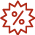

In [59]:
new_soup

In [60]:
new_soup.find("span", attrs={"id":'productTitle'}).text.strip()

'Fundamentals of Data Engineering: Plan and Build Robust Data Systems (Grayscale Indian Edition)'

In [61]:
new_soup.find("span", attrs={"class":'a-size-base a-color-price a-color-price'}).text.strip()

'₹1,750.00'

In [80]:
new_soup.find("span", attrs={"id":'price'}).text

'₹1,750.00'

In [63]:
new_soup.find("span",attrs={"class": "a-icon-alt"}).text.strip()

'4.7 out of 5 stars'

In [78]:

author_elements = new_soup.find_all('span', {'class': 'author notFaded'})
authors = []
for author_element in author_elements:
    author_name = author_element.find('a').text.strip()
    author_name = author_name.replace('(Author)', '').strip()
    authors.append(author_name)
print(authors)

['Joe Reis', 'Matt Housley']
